<a href="https://colab.research.google.com/github/turnleftorgo/Deep_learning/blob/main/Image_stitching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIT5221 Assignment 1

- Name: Lexi Li
- ID: 34217886

## Task 1: Harris corner detection (8 marks)

In [ ]:
import sys
print(sys.version)

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, maximum_filter
from skimage.feature import corner_harris, corner_peaks
from skimage import io,data,color

In [ ]:
def my_harris_corner_detector( image, sigma=1, alpha= 0.03, threshold = 0.03, tolerance= 1 ):

  Ix = gaussian_filter(image, sigma=sigma, order=(0,1))
  Iy = gaussian_filter(image, sigma=sigma, order=(1,0))     # step 1 , calculate the partial derivatives in x and y for each pixel

  Ixx = Ix*Ix
  Ixy = Ix*Iy
  Iyy = Iy*Iy                                               # step 2, calculate the components of  second moment matrix

  Ixx = gaussian_filter(Ixx, sigma=sigma)                   # Reduce random noise caused by square derivatives
  Ixy = gaussian_filter(Ixy, sigma=sigma)
  Iyy = gaussian_filter(Iyy, sigma=sigma)

  det_M = Ixx * Iyy - Ixy * Ixy
  trace_M = Ixx + Iyy

  R = det_M - alpha * trace_M * trace_M                     # step 3, Create the Response function

  T = threshold * R.max()                                   # step 4, set threshold

  R_max_bool = R > T

  R_local_max = maximum_filter(R,size=3)                              # step 5, find local maximum of Response function

  R_local_max_bool = ( R == R_local_max )

  corner_points_bool = R_max_bool & R_local_max_bool

  corner_points = np.argwhere(corner_points_bool)           # Got all corner points so far

  count_own_detect = len(corner_points)

  """The skimage's function"""

  harris_response = corner_harris(image, sigma=sigma)

  ski_output = corner_peaks( harris_response , threshold_rel=threshold)

  count_ski_detect = len(ski_output)

  """find overlapped corner"""

  overlap_count = 0

  for oc in corner_points:
      distance = np.sqrt((ski_output[:,0]-oc[0])**2+(ski_output[:,1]-oc[1])**2)
      if np.any(distance < tolerance) :
          overlap_count += 1

  """ plot corner point in image"""

  plt.figure(figsize=(10,10))
  plt.imshow(image, cmap='gray')

  plt.plot(corner_points[:,1],corner_points[:,0],'r+', markersize=10,label="own detected")
  plt.plot(ski_output[:,1],ski_output[:,0],'bo', markersize=10,label="ski function detected")
  plt.legend()
  plt.show()

  """Result"""

  print("number of corners own detected is", count_own_detect )
  print("number of corners ski function detected is", count_ski_detect )
  print("number of overlapped corners is", overlap_count )

  return corner_points, ski_output




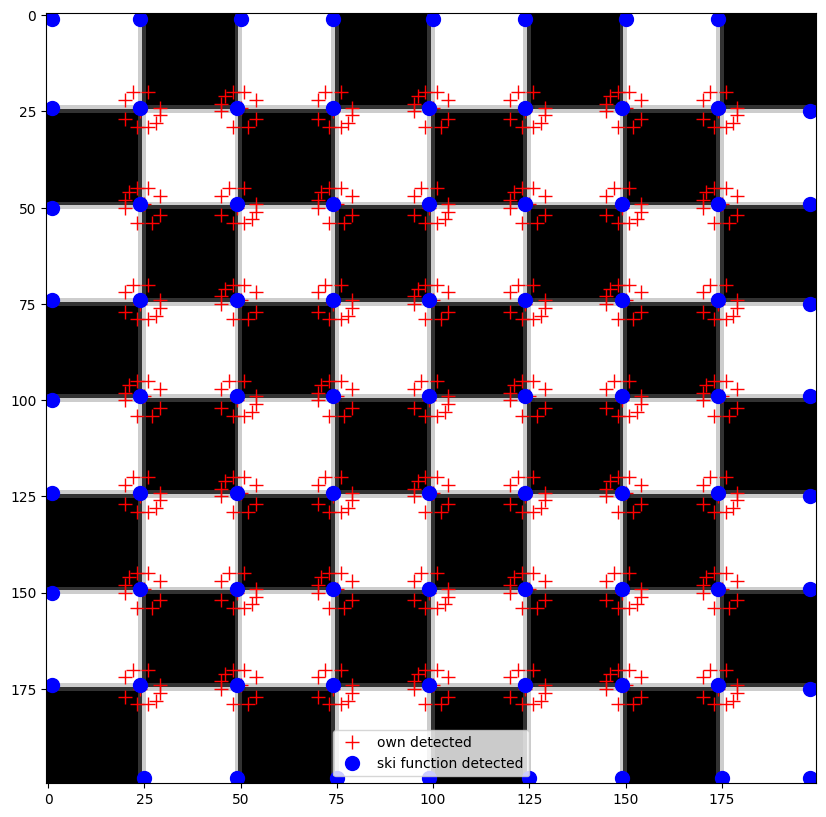

number of corners own detected is 490
number of corners ski function detected is 79
number of overlapped corners is 49


In [ ]:
checkerboard = data.checkerboard()

corner_points, ski_output = my_harris_corner_detector(checkerboard,sigma=1, alpha=0.02, threshold=0.01,tolerance=2)

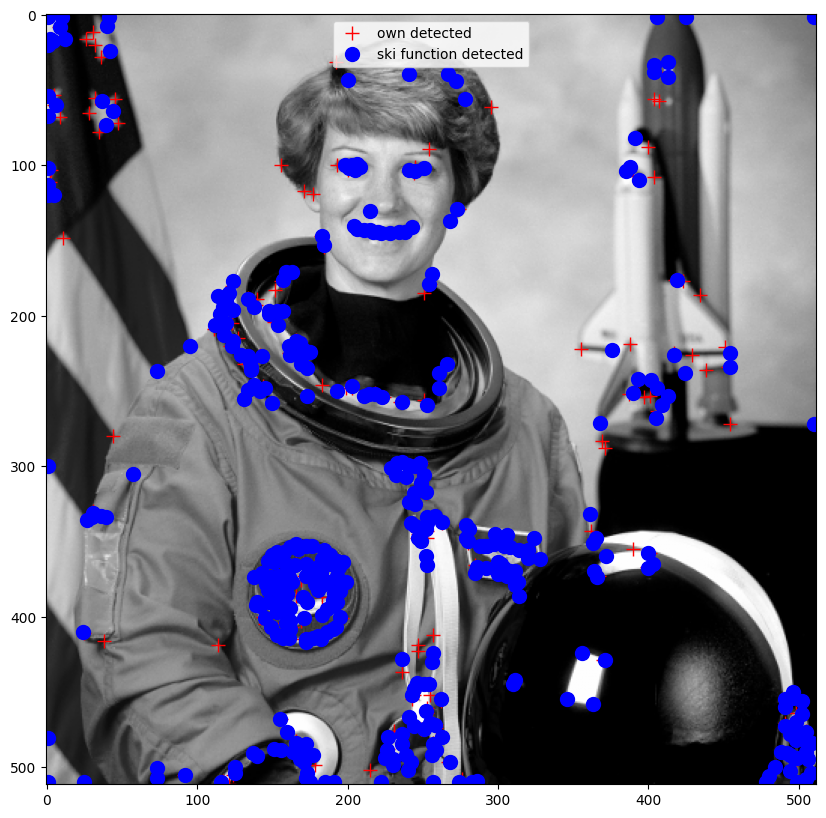

number of corners own detected is 403
number of corners ski function detected is 399
number of overlapped corners is 309


In [ ]:
astronaut = data.astronaut()
grayscale_astronaut = color.rgb2gray(astronaut)

# Test the Harris corner detector function.
corner_points, ski_output = my_harris_corner_detector(grayscale_astronaut,sigma=1, alpha=0.02, threshold=0.01,tolerance=2)


In [ ]:
import gdown
!gdown --fuzzy https://drive.google.com/file/d/10st21k9-QFN8w3MZ7KECOGqkPkbTlWaQ/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/108WtDh1VvePJguU6_kQRJLICf2fpfUp5/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1SRF8OcoFyqYyqVwb-0JTyPCodz2V6kCm/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1wZtPdK9-N8QBQOBRmBKrCKMg2_YQUYwu/view?usp=sharing



Downloading...
From: https://drive.google.com/uc?id=10st21k9-QFN8w3MZ7KECOGqkPkbTlWaQ
To: /content/castle_1.jpg
100% 90.6k/90.6k [00:00<00:00, 80.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=108WtDh1VvePJguU6_kQRJLICf2fpfUp5
To: /content/castle_2.jpg
100% 119k/119k [00:00<00:00, 87.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SRF8OcoFyqYyqVwb-0JTyPCodz2V6kCm
To: /content/singapore_1.jpg
100% 120k/120k [00:00<00:00, 79.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wZtPdK9-N8QBQOBRmBKrCKMg2_YQUYwu
To: /content/singapore_2.jpg
100% 80.8k/80.8k [00:00<00:00, 96.5MB/s]


In [ ]:
castle_1 = io.imread("castle_1.jpg")
grayscale_castle_1 = color.rgb2gray(castle_1)
castle_2 = io.imread("castle_2.jpg")
grayscale_castle_2 = color.rgb2gray(castle_2)
singapore_1 = io.imread("singapore_1.jpg")
grayscale_singapore_1 = color.rgb2gray(singapore_1)
singapore_2 = io.imread("singapore_2.jpg")
grayscale_singapore_2 = color.rgb2gray(singapore_2)

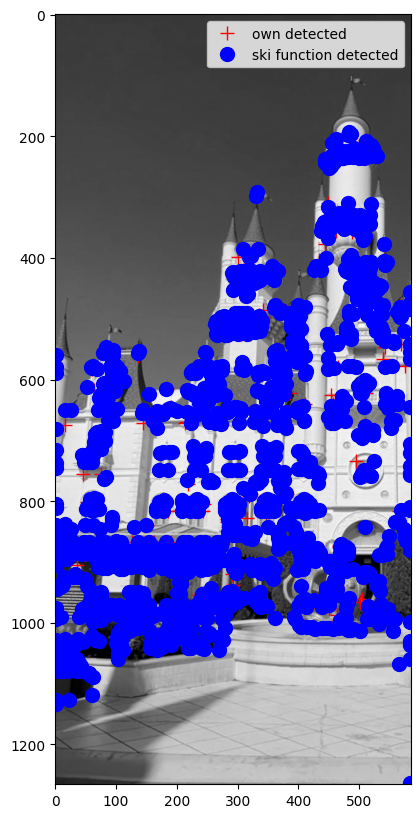

number of corners own detected is 1345
number of corners ski function detected is 1431
number of overlapped corners is 846


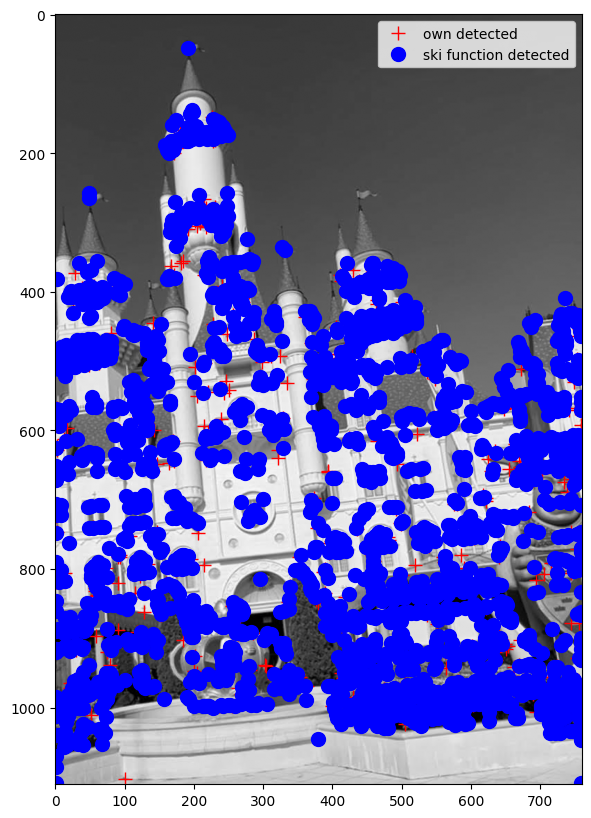

number of corners own detected is 2437
number of corners ski function detected is 2258
number of overlapped corners is 1413


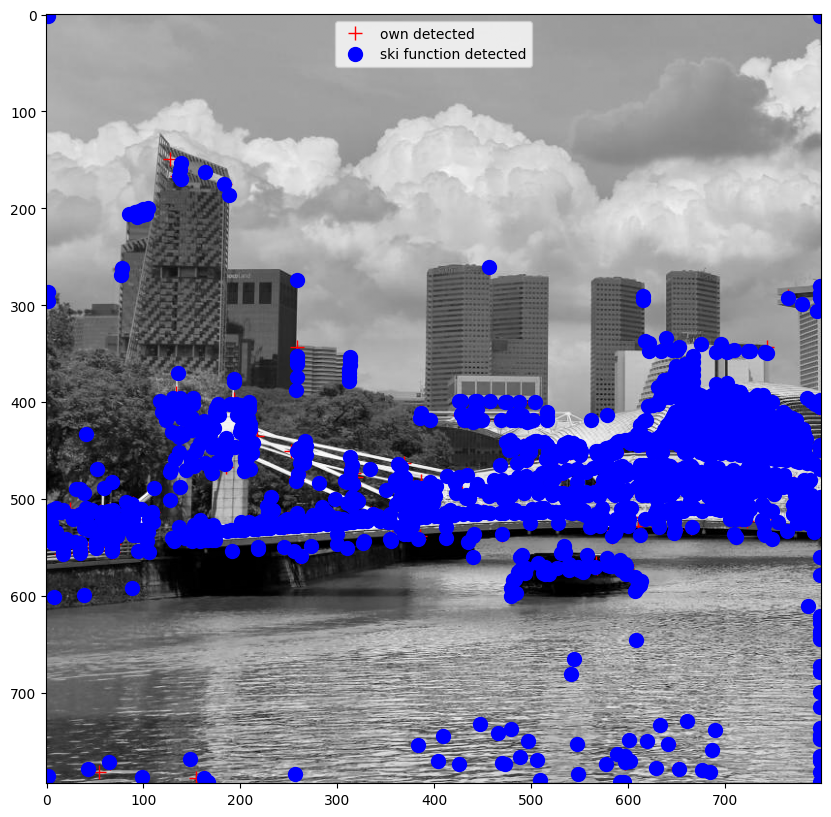

number of corners own detected is 1038
number of corners ski function detected is 1470
number of overlapped corners is 518


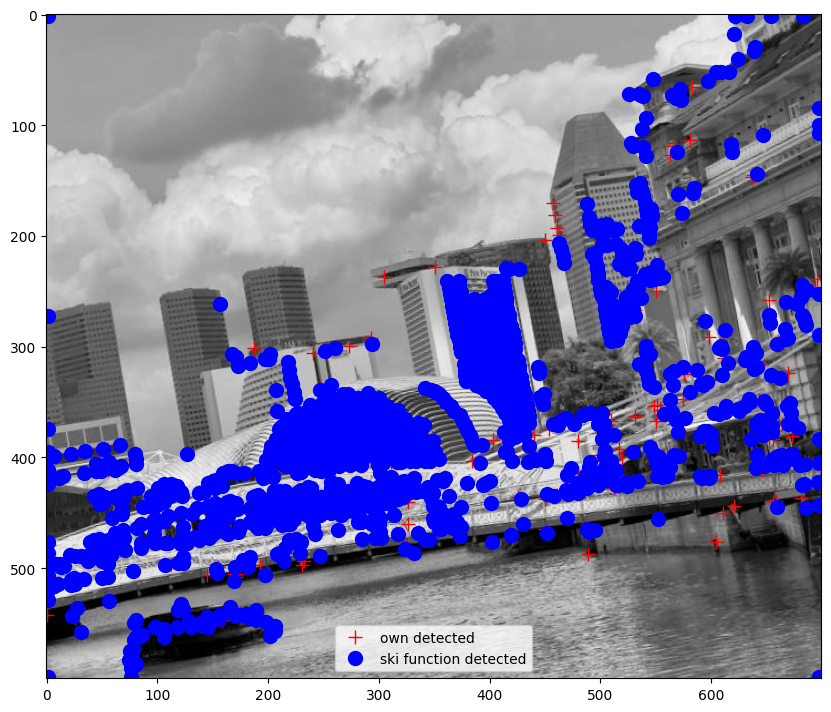

number of corners own detected is 1016
number of corners ski function detected is 1292
number of overlapped corners is 544


In [ ]:
corner_points, ski_output = my_harris_corner_detector(grayscale_castle_1,sigma=1, alpha=0.04, threshold=0.03,tolerance=1)
corner_points, ski_output = my_harris_corner_detector(grayscale_castle_2,sigma=1, alpha=0.04, threshold=0.03,tolerance=1)
corner_points, ski_output = my_harris_corner_detector(grayscale_singapore_1,sigma=1, alpha=0.04, threshold=0.03,tolerance=1)
corner_points, ski_output = my_harris_corner_detector(grayscale_singapore_2,sigma=1, alpha=0.04, threshold=0.03,tolerance=1)

In [ ]:
# Test the `my_harris_corner_detector` function with 6 images:
# - skimage.data.astronaut()
# - skimage.data.checkerboard()
# - castle_1.jpg
# - castle_2.jpg
# - singapore_1.jpg
# - singapore_2.jpg


## Task 2. Homography estimation (2 marks)

In [ ]:
# Import libraries
import numpy as np

In [ ]:
# Complete this function
def my_homography_estimation(X1, X2):
    N = X1.shape[0]
    A = []
    for i in range(N):
        x1, y1 = X1[i,0],X1[i,1]
        x2, y2 = X2[i,0],X2[i,1]
        A.append([x1, y1, 1, 0, 0, 0, -x2*x1, -x2*y1, -x2])
        A.append([0, 0, 0, x1, y1, 1, -y2*x1, -y2*y1, -y2]) # this is for  representation of linear system in homography transformation
    A = np.array(A, dtype=np.float64)
    _, _, vh = np.linalg.svd(A)                             # use svd to solve the linear system
    h = vh[-1]
    h = h.reshape(3,3)

    if h[2,2] != 0:
        h = h / h[2,2]
    else:
        h = h / h[2,2]


    return h

In [ ]:
# test
P1 = np.asarray([[428, 171],
                  [547, 137],
                  [60,  90],
                  [397, 208],
                  ])
P2 = np.asarray([[51, 152],
                [162, 98],
                [162,  98],
                [27, 194],
                ])
my_homography_estimation(P1, P2)

array([[-2.83578559e-01, -2.37592847e-01,  1.62000000e+02],
       [-1.71547523e-01, -1.43729006e-01,  9.80000000e+01],
       [-1.75048493e-03, -1.46662251e-03,  1.00000000e+00]])

## Task 3. RANSAC (6 marks)

In [ ]:
from numpy.random import default_rng

In [ ]:
def my_ransac(P1, P2,loop_round = 1000,inlier_therehold = 4.0):

  rng = default_rng()
  N = P1.shape[0]
  best_H = None
  best_H_inlier_count = 0

  max_inlier_count = 0

  if N < 4 :
     return None, 0

  for i in range(loop_round) :
    sample_index = rng.choice(N, size=4, replace=False)
    X1 = P1[sample_index]
    X2 = P2[sample_index]

    H = my_homography_estimation(X1, X2)

    P1_homo_form = np.hstack((P1, np.ones((N,1))))
    estimate_coordinate = (H@P1_homo_form.T).T

    w = estimate_coordinate[:,2] + 1e-14
    X1_estimate = estimate_coordinate[:,0]/w         # make sure it become X1,Y1,1 again
    X2_estimate = estimate_coordinate[:,1]/w

    x_errror = X1_estimate - P2[:,0]
    y_errror = X2_estimate - P2[:,1]
    distance = np.sqrt(x_errror**2 + y_errror**2)

    inilier_count = np.sum(distance < inlier_therehold)

    if inilier_count > max_inlier_count :
      max_inlier_count = inilier_count

      best_H = H
      best_H_inlier_count = inilier_count





  return best_H, best_H_inlier_count

In [ ]:
# Test `my_ransac`  with P1, P2 as below

import numpy as np

P1 = np.asarray([[428, 171],
                  [547, 137],
                  [60,  90],
                  [397, 208],
                  [521, 224],
                  [563, 333],
                  [507, 178],
                  [476, 277],
                  [180, 353],
                  [543, 307],
                  [531, 98]])
P2 = np.asarray([[51, 152],
                [162, 98],
                [162,  98],
                [27, 194],
                [152, 189],
                [51, 152],
                [130, 145],
                [117, 248],
                [26, 434],
                [188, 266],
                [140, 63]])

H,C = my_ransac(P1, P2)
print("Transformation matrix: ", H)
print("Number of inliers: ",C)

Transformation matrix:  [[ 1.02350531e+00  1.83147743e-01 -4.17225082e+02]
 [-1.62271641e-01  1.02035167e+00  5.04368118e+01]
 [ 6.32570846e-05  5.32127033e-06  1.00000000e+00]]
Number of inliers:  8


## Task 4. Image stitching (4 marks)


Test `my_image_stitching` function with three pair of input images:
- First test input:
  - image 1 is `castle_1.jpg`
  - image 2 is `castle_2.jpg`

  - Generate a stitched image from `image 1` and `image 2`, save this image under `stitched_castle.jpg`

- Second test input:
  - image 1 is `singapore_1.jpg`
  - image 2 is `singapore_2.jpg`.
  - Generate a stitched image from `image 1` and `image 2`, save this image under `stitched_singapore.jpg`

- Third test input:
  - image 1 is `monash_building_1.jpg`
  - image 2 is `monash_building_1.jpg`.
  - Generate a stitched image from `image 1` and `image 2`, save this image under `stitched_monash.jpg`

To write an image as a file, you can use function `skimage.io.imsave(image_name, stitched_image)`

In [ ]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, maximum_filter
from skimage.feature import corner_harris, corner_peaks
from skimage import io,data,color

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1Wz1xbgdG9sISisCNf9eXNCEBI6K3qzcy/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1j_dpMToFqQvIMP0OH-nNysHXs4QmA681/view?usp=sharing
monash_building_1 = io.imread("monash_building_1.jpg")
grey_scale_monash_building_1 = color.rgb2gray(monash_building_1)
monash_building_2 = io.imread("monash_building_2.jpg")
grey_scale_monash_building_2 = color.rgb2gray(monash_building_2)


Downloading...
From: https://drive.google.com/uc?id=1Wz1xbgdG9sISisCNf9eXNCEBI6K3qzcy
To: /content/monash_building_1.jpg
100% 54.6k/54.6k [00:00<00:00, 84.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1j_dpMToFqQvIMP0OH-nNysHXs4QmA681
To: /content/monash_building_2.jpg
100% 56.1k/56.1k [00:00<00:00, 79.4MB/s]


In [ ]:
# Helper function to visualize matching keypoints of image 1 and image 2
def visualize_matches(img1, img2, kp1=None, kp2=None, gap=50, lw=3, title="Matching keypoints"):
  '''
    kp1, kp2 is a list coordination of keypoints with size of Nx2

  '''
  large_image = np.zeros((max(img1.shape[0], img2.shape[0]), img1.shape[1] + img2.shape[1] + gap, 3), dtype=np.uint8)
  start_img2 = img1.shape[1] + gap

  large_image[:img1.shape[0], :img1.shape[1]] = img1
  large_image[:img2.shape[0], start_img2:start_img2+img2.shape[1]] = img2
  plt.figure(figsize=(10,10))
  plt.imshow(large_image)
  plt.title("{}\nImage 1                                              Image 2".format(title))
  for p1, p2 in zip(kp1, kp2):
    x = [p1[0], p2[0]+start_img2]    # because location x of image 2 is shifted `start_img2` to the right
    y = [p1[1], p2[1]]
    plt.plot(x, y, linewidth=lw)
  plt.show()

In [ ]:
# Complete this function
def my_image_stitching(image_1,image_2):
  # Step 1: Detect key points with Harris corner detector
  grayscale_grayscale_image_1 = color.rgb2gray(image_1)
  grayscale_grayscale_image_2 = color.rgb2gray(image_2)
  corner_points_1, _ = my_harris_corner_detector(grayscale_grayscale_image_1,sigma=1, alpha=0.02, threshold=0.01,tolerance=2)
  corner_points_2, _ = my_harris_corner_detector(grayscale_grayscale_image_2,sigma=1, alpha=0.02, threshold=0.01,tolerance=2)
  # Step 2: Extract local descriptors
  keypoints_1 = []
  keypoints_2 = []

  for pp in corner_points_1:
      ppt = cv2.KeyPoint(float(pp[0]),float(pp[1]),6)
      keypoints_1.append(ppt)

  for pp in corner_points_2:
      ppt = cv2.KeyPoint(float(pp[0]),float(pp[1]),6)
      keypoints_2.append(ppt)

  sift = cv2.SIFT_create()

  grayscale_image_1 = cv2.convertScaleAbs(image_1)
  grayscale_image_2 = cv2.convertScaleAbs(image_2)                               # correct the datatype

  keypoints_1, descriptors_1 = sift.compute(grayscale_image_1, keypoints_1)
  keypoints_2, descriptors_2 = sift.compute(grayscale_image_2, keypoints_2)

  # Step 3: Match keypoints
  matcher = cv2.BFMatcher()
  matches = matcher.knnMatch(descriptors_1, descriptors_2, k=2)
  good_matches = []
  for m, n in matches:
      if m.distance < 0.8 * n.distance:
          good_matches.append(m)
  match_img_1 = []
  match_img_2 = []
  for m in good_matches:
      match_img_1.append(keypoints_1[m.queryIdx])
      match_img_2.append(keypoints_2[m.trainIdx])

  handle1 = np.array([kp.pt for kp in match_img_1], dtype=np.float32)
  handle2 = np.array([kp.pt for kp in match_img_2], dtype=np.float32)



        ### Visualize all matches
  visualize_matches(image_1, image_2, kp1=handle1, kp2=handle2, gap=50, lw=3, title="Matching keypoints")

  # Step 4: Estimate the homography matrix

  H,_ = my_ransac(handle1, handle2)

  H = H.astype(np.float32)
        ### Visualize inlier matches
          # visualize_matches(....)

  # Step 5: Apply a warping transformation

  H1,W1 = image_1.shape[:2]
  H2,W2 = image_2.shape[:2]

  Canvas_H = max(H2,H1)
  Canvas_W = W1+W2

  wrap_image_2 = cv2.warpPerspective(image_2, H, (Canvas_W, Canvas_H))

  # Step 6: Merge image 1 and the transformed image 2
  stitched_image = np.zeros((Canvas_H, Canvas_W, 3), dtype=np.uint8)
  stitched_image[:H1, :W1] = image_1

  mask = (wrap_image_2.sum(axis=2) > 0)                                            # shape [512,512]
  stitched_image[mask] = wrap_image_2[mask]                                        # replace all pixels in stitched_image which is true index, with wrapped image 2's true pixels
  plt.imshow(stitched_image)
  plt.show()

  return stitched_image

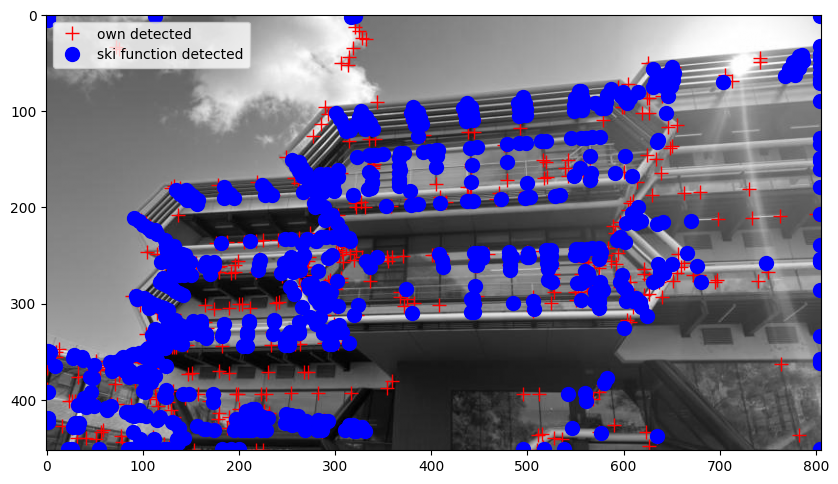

number of corners own detected is 977
number of corners ski function detected is 665
number of overlapped corners is 559


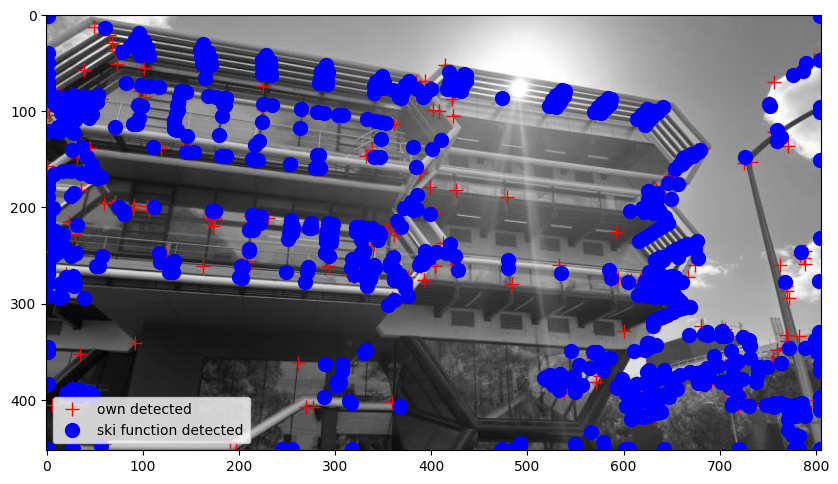

number of corners own detected is 790
number of corners ski function detected is 685
number of overlapped corners is 580


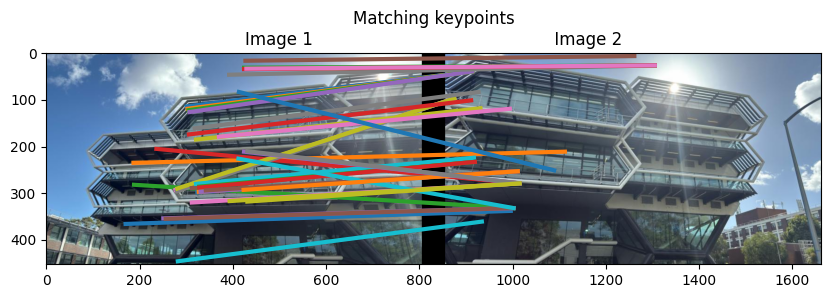

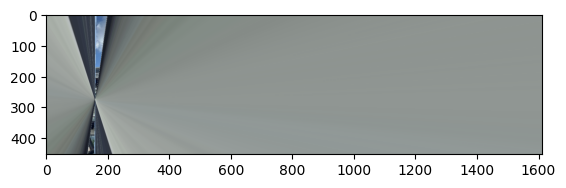

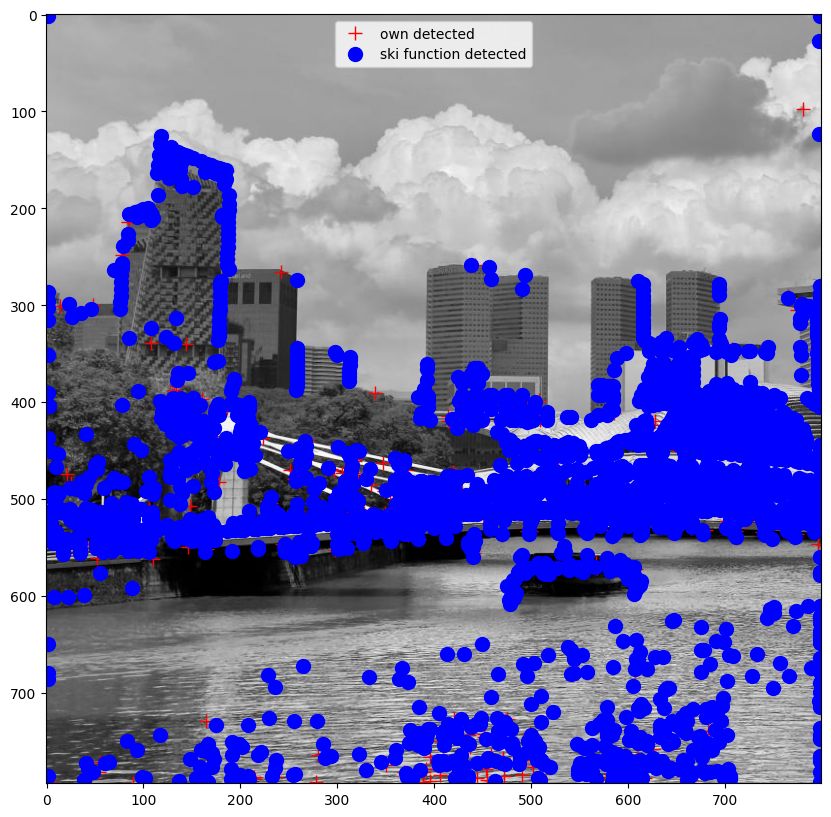

number of corners own detected is 1960
number of corners ski function detected is 2357
number of overlapped corners is 1570


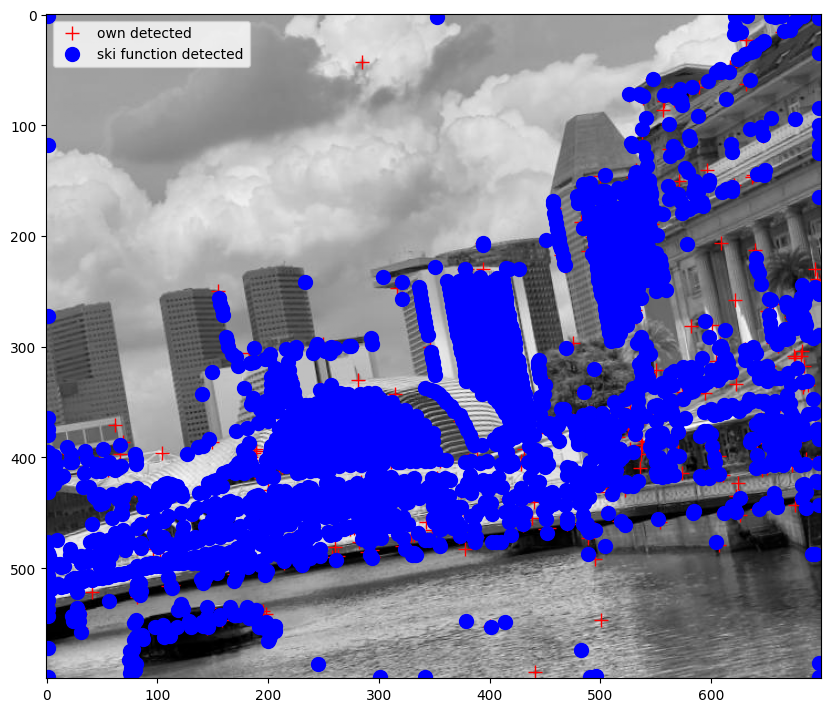

number of corners own detected is 1925
number of corners ski function detected is 2166
number of overlapped corners is 1561


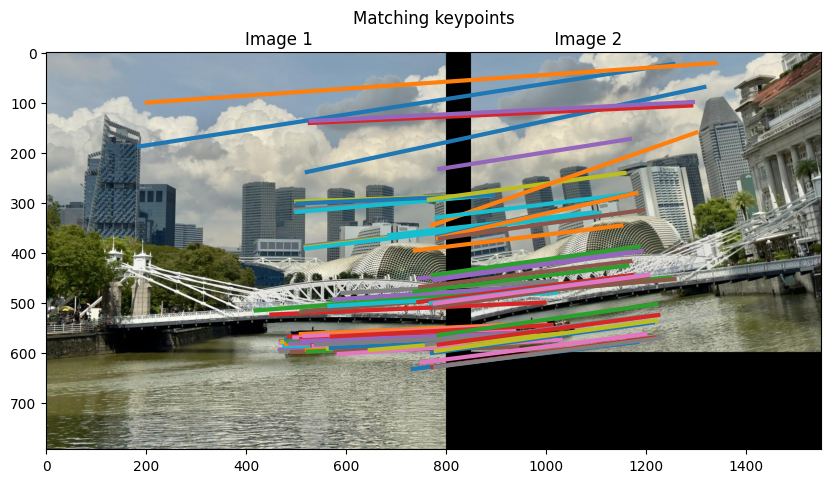

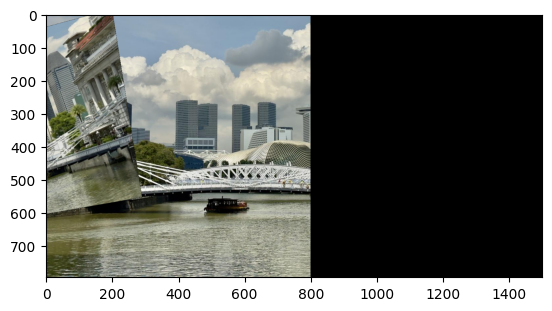

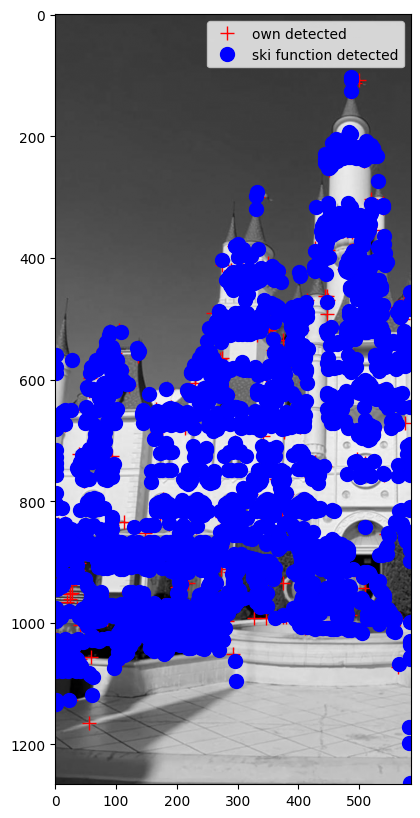

number of corners own detected is 2369
number of corners ski function detected is 2365
number of overlapped corners is 1990


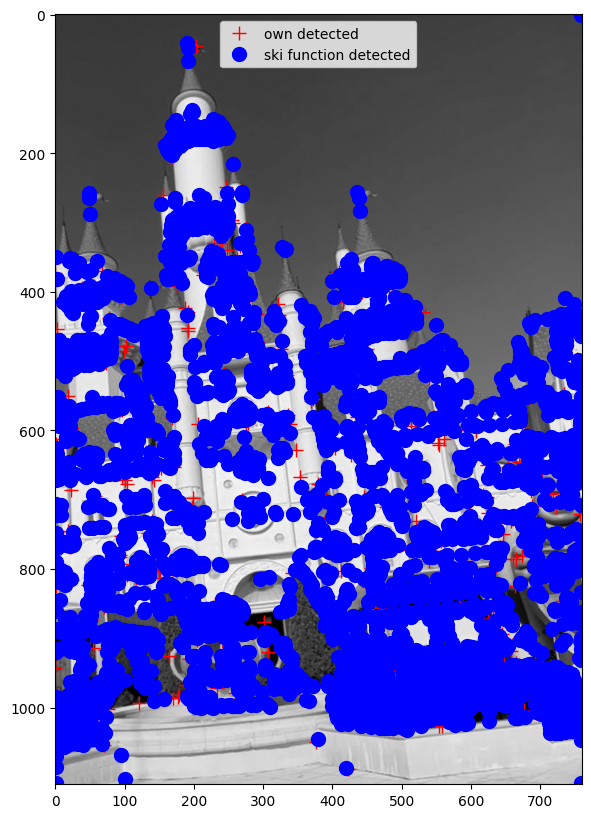

number of corners own detected is 4052
number of corners ski function detected is 3868
number of overlapped corners is 3318


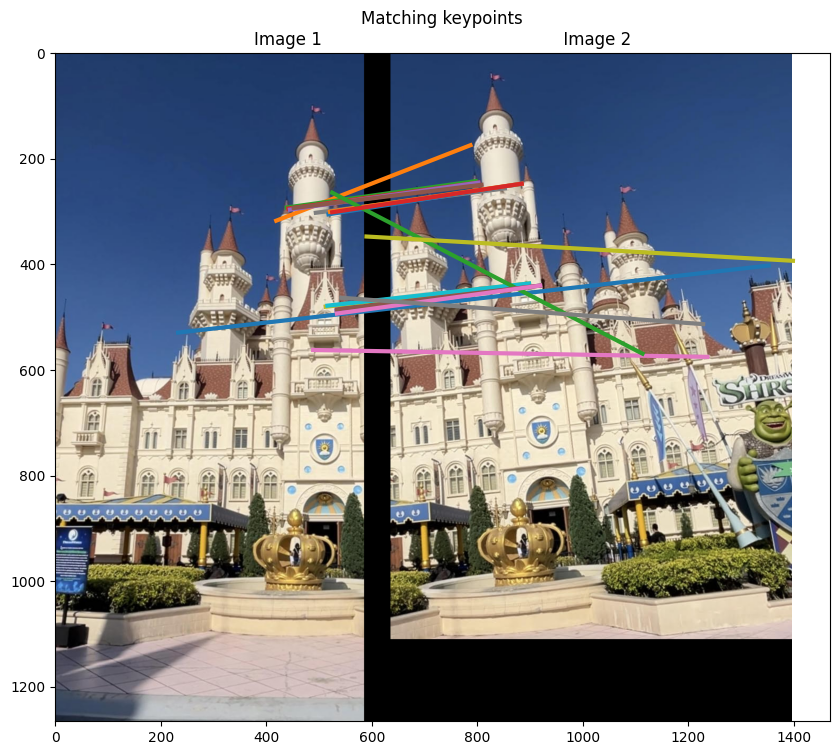

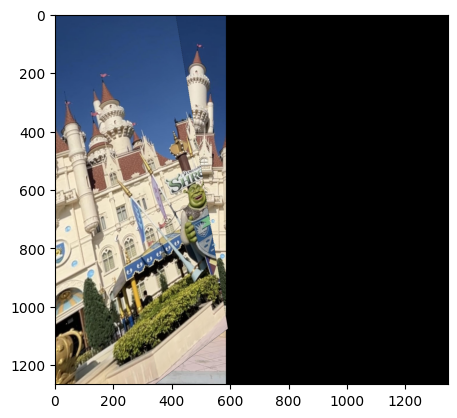

In [ ]:
# test
stitched_monash = my_image_stitching(monash_building_1,monash_building_2)
io.imsave("stitched_monash.jpg", stitched_monash)

stitched_singapore = my_image_stitching(singapore_1,singapore_2)
io.imsave("stitched_singapore.jpg", stitched_singapore)

stitched_castle = my_image_stitching(castle_1,castle_2)
io.imsave("stitched_castle.jpg", stitched_castle)

=========================== End ===========================